# Testing on caltech101 Dataset

**Importing the libraries and loading the dataset**

In [1]:
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from Classifier import Classifier
import os
import openai
import configparser
import torch
import clip

config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['openai']['api_key']
openai.api_key = api_key

# Load the dataset using ImageFolder
dataset = ImageFolder(root='./caltech101')
labels=dataset.classes

Label: Motorbikes


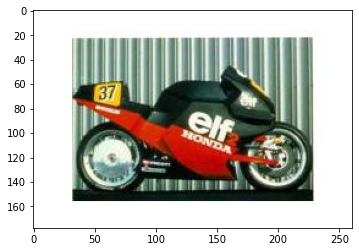

In [2]:
print(f"Label: {labels[dataset[2051][1]]}")
plt.imshow(dataset[2051][0])

**Creating a classifier and loading descriptors that were generated previously**

In [3]:
caltech=Classifier(labels)

In [4]:
caltech.load_classifier('caltech.txt')

In [5]:
caltech.descriptors['Motorbikes']

['has handlebars', 'has two wheels', 'has a motor']

**Classifying with the descriptors**

In [6]:
indices = torch.randperm(len(dataset))[:100]
dataset2=[]
for idx in indices:
    dataset2.append(dataset[idx])

In [7]:
images=torch.stack([caltech.preprocess(image) for (image,label) in dataset])

In [ ]:
pred=caltech.multi_classify(images,preprocessed=True)
print(f"Accuracy: {torch.mean((pred==torch.Tensor([label for (image,label) in dataset2]))+0.)}")

**Classifying without descriptors**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

In [ ]:
tokenized_text = torch.cat([clip.tokenize(label) for label in labels]).to(device)
logits=model(images,tokenized_text)[0]
pred=torch.argmax(logits,dim=1)
print(f"Accuracy: {torch.mean((pred==torch.Tensor([label for (image,label) in dataset2]))+0.)}")